Also from Po, a Star Wars blaster battle puzzle:

In Star Wars battles, sometimes a severely outnumbered force emerges victorious through superior skill. You panic when you see a group of nine stormtroopers coming at you from very far away in the distance. Fortunately, they are notoriously inaccurate with their blaster fire, with only a 0.1 percent chance of hitting you with each of their shots. You and each stormtrooper fire blasters at the same rate, but you are $K$ times as likely to hit your target with each shot. Furthermore, the stormtroopers walk in a tight formation, and can therefore create a larger target area. Specifically, if there are N stormtroopers left, your chance of hitting one of them is $(K⋅\sqrt{N})/1000$. Each shot has an independent probability of hitting and immediately taking out its target. For approximately what value of $K$ is this a fair match between you and the stormtroopers (where you have 50 percent chance of blasting all of them)?

# [RobShearer solution](https://gist.github.com/rvcx/808d1b669eaa326d9fa2b7cebcf8c359)

In [14]:
from math import sqrt
from random import random

def simulate(n, k, base_rate):
    while n:
        # each storm trooper shoots
        for i in range(n):
            if random() < base_rate:
                return False
        # you shoot
        if random() < k * base_rate * sqrt(n):
            n -= 1
    return True

def sample(size, func):
     return sum(1.0 for x in range(size) if func()) / size

def target(tval, min, max, steps, func):
    for i in range(steps):
        probe = (min + max) / 2.0
        val = func(probe)
        print(probe, val, tval)
        if val < tval:
            min = probe
        else:
            max = probe
    return probe

print(target(0.5, 1, 1000, 10,lambda k: sample(1000,lambda: simulate(9, k, 0.001))))

500.5 0.946 0.5
250.75 0.924 0.5
125.875 0.873 0.5
63.4375 0.755 0.5
32.21875 0.542 0.5
16.609375 0.347 0.5
24.4140625 0.48 0.5
28.31640625 0.543 0.5
26.365234375 0.484 0.5
27.3408203125 0.504 0.5
27.3408203125


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

q the probability that a stormtrooper blasts us: q = $\frac{1}{1000}$
<br />P(N) the probability that we will blast the last stormtroopers before they hit us

- The probability that we blast a stortrooper is given as $qK\sqrt{N}$
- The probability that one stormtrooper does NOT blast us is 1 - q so the probability that we survive from N stormtroopers is $(1-q)^N$

$$ P(0) = 1$$
$$ P(N) = (1-q)^N [(1 - qK\sqrt{N})P(N) + qK\sqrt{N}p(N-1)]$$

The initial condition is that when there are no stormtroopers left, we have a 100% chance of blasting them all so $P(0)=1$. This recursion can be rearranged so that it’s in a bit easier to work with:
$$P(N) = (\frac{(1-q)^N(qK\sqrt{N})}{1-(1-q)^N(1-qK\sqrt{N})})P(N-1)$$
To handle the recursion:
$$P(N) = \prod_{n=1}^N\frac{(1-q)^n(qK\sqrt{n})}{1-(1-q)^n(1-qK\sqrt{n})}$$

In [36]:
def stormtrooper(K):
    N = 9
    q = 1/1000
    p = 1
    for n in np.arange(1,N+1):
        a = (1-q)**n
        b = q * K * np.sqrt(n)
        p =(a * b) / (1 - a*(1-b)) * p
    difference = np.abs(p - 0.5)
    return difference

In [17]:
from scipy.optimize import fmin

In [42]:
outs=fmin(stormtrooper,22)
print('the approximation shows: %.3f'%outs)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 18
         Function evaluations: 36
the approximation shows: 26.797


In [50]:
def stormtrooper(K, N):
    q = 1/1000
    p = 1
    for n in np.arange(1,N+1):
        a = (1-q)**n
        b = q * K * np.sqrt(n)
        p =(a * b) / (1 - a*(1-b)) * p
    return p

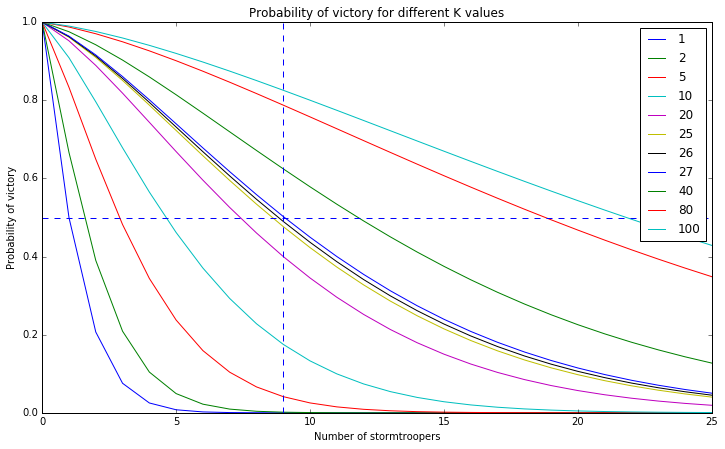

In [70]:
Ks = [1,2,5,10,20,25,26,27,40,80,100]
Ns = np.arange(1,26)
P = np.zeros((len(Ks),len(Ns)))
for ii,K in enumerate(Ks):
    for jj,N in enumerate(Ns):
        P[ii,jj] = stormtrooper(K,N)

fig,ax = plt.subplots(figsize=(12,7))
for ii,K in enumerate(Ks):
    ax.plot(np.concatenate(([0],Ns)),np.concatenate(([1],P[ii,:])),label=str(K))
ax.set(xlabel='Number of stormtroopers',ylabel='Probability of victory',
      title='Probability of victory for different K values')
ax.axvline(9,linestyle='--')
ax.axhline(0.5,linestyle='--')
ax.legend()